In [39]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
features = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
results = df['Outcome']


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

features_train, features_test, results_train, results_test = train_test_split(features, results, train_size=0.75, random_state=1)
classifier = RandomForestClassifier(random_state=2)
classifier.fit(features_train, results_train)

predictions = classifier.predict(features_test)

predicted_class = predictions
actual_class = results_test

# confusion matrix
Cmatrix = confusion_matrix(actual_class, predicted_class)
print(Cmatrix)  

# accuracy
correctPredictions = np.sum(predicted_class==actual_class)
totalPredictions = len(predicted_class)                         #   total number of predictions
acc = correctPredictions/totalPredictions                       #   test accuracy
print('\nTest accuracy of decision tree classifier:',format(acc*100,'.2f'),"%")


[[108  15]
 [ 19  50]]

Test accuracy of decision tree classifier: 82.29 %


In [118]:
  # USE THIS CODE TO DETERMINE THE CLASS OF THE CORRECT PREDICTIONS
sum=0
for i in np.arange(len(predicted_class)):
    if predicted_class[i] == actual_class.iloc[i]:
        if predicted_class[i] == 1:
            sum+=1
print(sum)

50


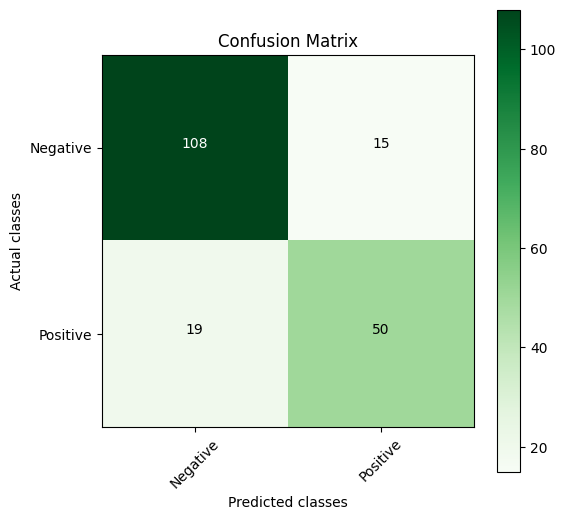

In [111]:
import matplotlib.pyplot as plt 

#   plotting confusion matrix for data visualization
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.matshow(Cmatrix, cmap='Greens')
fig.colorbar(cax)

class_names = ['Negative','Positive']
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=45)
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.title('Confusion Matrix')

# adding text annotations to the cells
thresh = Cmatrix.max() / 2.
for i in range(Cmatrix.shape[0]):
    for j in range(Cmatrix.shape[1]):
        plt.text(j, i, format(Cmatrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if Cmatrix[i, j] > thresh else "black")

plt.show()

In [78]:
preg = int(input('Enter number of pregnancies: '))
age = int(input('Enter your age: '))
glucose = int(input('Enter blood glucose concentration (mg/dL): '))
bp = int(input('Enter diastolic blood pressure (mm Hg): '))
skinThickness = int(input('Enter triceps skin fold thickness (mm):'))
insulin = int(input('Enter insulin level (micro units/mL):'))
bmi = float(input('Enter BMI (kg/m^2):'))
dpf = float(input('Enter Diabetes Pedigree Function:'))


In [112]:
sample = pd.DataFrame({'Pregnancies':[preg], 'Glucose':[glucose], 'BloodPressure':[bp], 'SkinThickness':[skinThickness], 
                        'Insulin':[insulin], 'BMI':[bmi], 'DiabetesPedigreeFunction':[dpf], 'Age':[age]})

z = classifier.predict(sample)

if z[0] == 1:
    print('Patient is positive for diabetes.')
else:
    print('Patient is negative for diabetes.')

sample



Patient is negative for diabetes.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,120,90,20,80,19.7,0.232,35
